In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download ashfakyeafi/cat-dog-images-for-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification
License(s): CC0-1.0
 98% 533M/545M [00:05<00:00, 91.1MB/s]
100% 545M/545M [00:05<00:00, 106MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images-for-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd
import shutil
import os

In [5]:
import os
print(os.listdir('/content/cat_dog'))

['dog.8151.jpg', 'dog.12210.jpg', 'dog.5590.jpg', 'dog.6970.jpg', 'cat.1887.jpg', 'dog.12415.jpg', 'dog.3506.jpg', 'cat.4906.jpg', 'cat.4095.jpg', 'dog.6881.jpg', 'dog.5831.jpg', 'cat.3236.jpg', 'cat.6490.jpg', 'cat.1576.jpg', 'cat.1585.jpg', 'cat.693.jpg', 'dog.9388.jpg', 'cat.914.jpg', 'dog.3626.jpg', 'dog.5107.jpg', 'dog.6388.jpg', 'cat.3150.jpg', 'dog.5808.jpg', 'cat.2150.jpg', 'cat.5588.jpg', 'cat.10938.jpg', 'dog.10976.jpg', 'dog.7470.jpg', 'dog.4159.jpg', 'cat.10331.jpg', 'dog.3877.jpg', 'cat.12067.jpg', 'cat.8608.jpg', 'dog.11341.jpg', 'dog.2802.jpg', 'cat.1351.jpg', 'dog.8730.jpg', 'dog.5219.jpg', 'cat.11046.jpg', 'dog.3211.jpg', 'dog.9912.jpg', 'dog.3352.jpg', 'cat.8346.jpg', 'cat.4806.jpg', 'dog.9106.jpg', 'cat.385.jpg', 'cat.6095.jpg', 'cat.11835.jpg', 'cat.5122.jpg', 'cat.1594.jpg', 'cat.3832.jpg', 'cat.6643.jpg', 'cat.10536.jpg', 'cat.8134.jpg', 'dog.9270.jpg', 'dog.5644.jpg', 'cat.11141.jpg', 'dog.4172.jpg', 'cat.3019.jpg', 'dog.4264.jpg', 'cat.4462.jpg', 'dog.7545.jpg',

In [6]:
data = pd.read_csv('/content/cat_dog.csv')
data.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [7]:
source_dir = '/content/cat_dog'

cat_dir = '/content/cat_dog/cat'
dog_dir = '/content/cat_dog/dog'

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    if os.path.isfile(os.path.join(source_dir, filename)) and filename.startswith("cat"):
        shutil.move(os.path.join(source_dir, filename), os.path.join(cat_dir, filename))
    elif os.path.isfile(os.path.join(source_dir, filename)) and filename.startswith("dog"):
        shutil.move(os.path.join(source_dir, filename), os.path.join(dog_dir, filename))

In [8]:
# Set path to the dataset
base_dir = '/content/cat_dog'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cat': 0, 'dog': 1}
Validation class labels: {'cat': 0, 'dog': 1}


In [10]:
images, labels = next(train_generator)
images, labels

(array([[[[0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          ...,
          [0.34117648, 0.30980393, 0.3019608 ],
          [0.27450982, 0.2392157 , 0.21960786],
          [0.28235295, 0.2392157 , 0.21568629]],
 
         [[0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          ...,
          [0.18431373, 0.15294118, 0.14509805],
          [0.3647059 , 0.32941177, 0.30980393],
          [0.21568629, 0.18039216, 0.15294118]],
 
         [[0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          [0.18823531, 0.16862746, 0.15686275],
          ...,
          [0.67058825, 0.6392157 , 0.6313726 ],
          [0.5803922 , 0.56078434, 0.5372549 ],
          [0.3254902 , 0.30980393, 0.27450982]],
 
         ...,
 
         [[0.882353  , 0.8313726 , 0.76470596],
          [0.77647

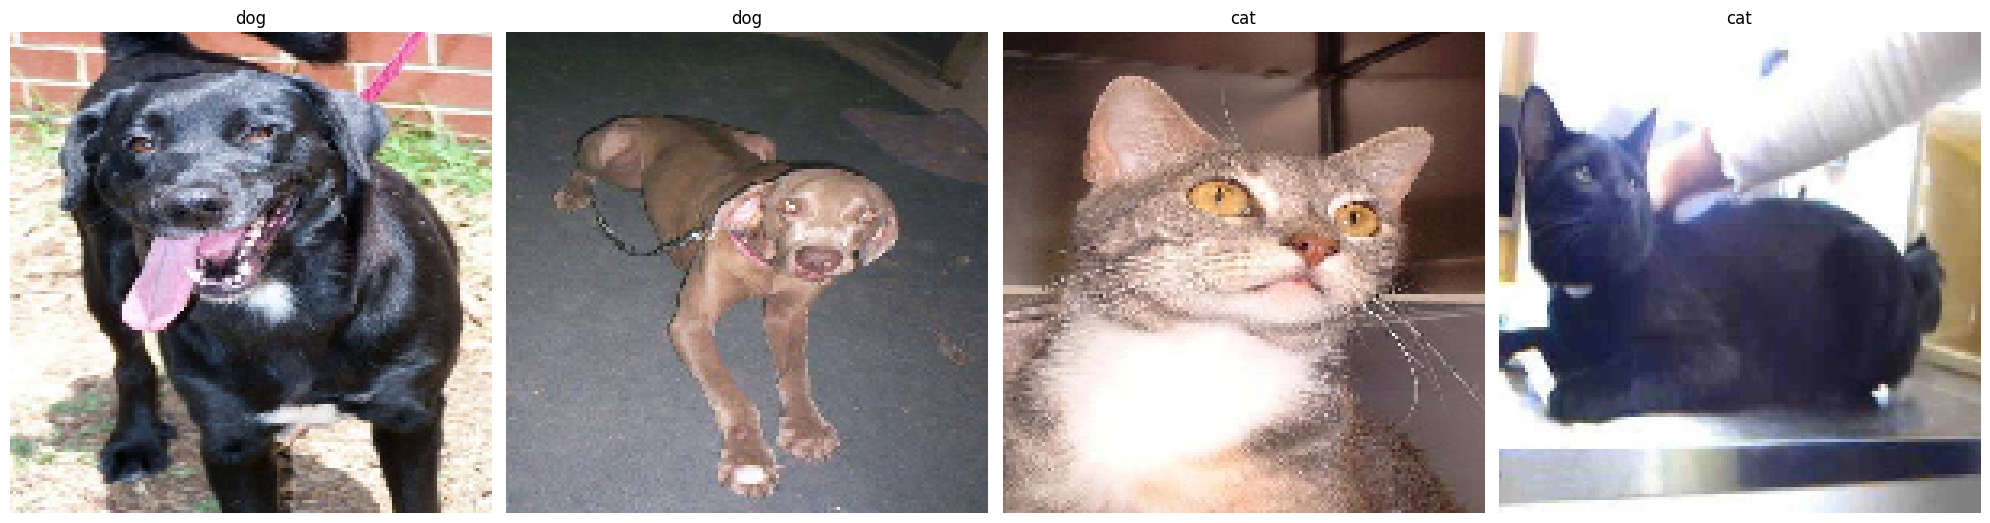

In [11]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [12]:
train_generator.reset()

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

1000.0 250.0


In [16]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.5537 - loss: 0.6850 - val_accuracy: 0.6758 - val_loss: 0.5980
Epoch 2/10
199/800 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6756 - loss: 0.6012

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6787 - loss: 0.5990 - val_accuracy: 0.6670 - val_loss: 0.5952
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.7115 - loss: 0.5636 - val_accuracy: 0.7630 - val_loss: 0.4828
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7764 - loss: 0.4727 - val_accuracy: 0.7730 - val_loss: 0.4776
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - accuracy: 0.7958 - loss: 0.4422 - val_accuracy: 0.8200 - val_loss: 0.3965
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8272 - loss: 0.3792 - val_accuracy: 0.8110 - val_loss: 0.4332
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.8447 - loss: 0.3577 - val_accuracy: 0.8223 - val_loss: 0.3885
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8739 - loss: 0.3001 - val_accuracy: 0.8500 - val_loss: 0.3498
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8795 - loss: 0.2738 - val_accuracy: 

In [17]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Prediction: [[0.03629423]]


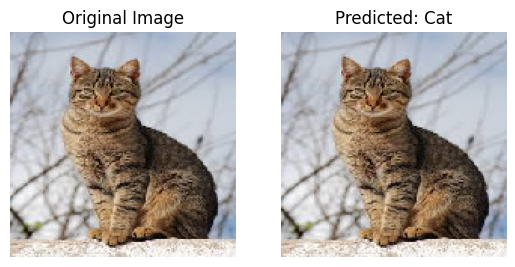

In [19]:
# Load and preprocess the image
img_path = '/content/cat.jpeg'
make_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: [[0.75411004]]


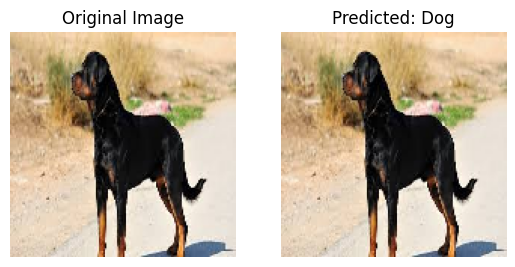

In [20]:
# Load and preprocess the image
img_path = '/content/dog.jpeg'
make_prediction(img_path)

EfficientNetB0

In [25]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 without the top layer (include_top=False)
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base layers
for layer in efficientnet_base.layers[-10:]:  # Unfreeze last 10 layers
    layer.trainable = True

# Build the model
model2 = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),  # Reduces feature maps to a single vector per feature
    layers.Dense(256, activation='relu'),  # Dense layer for learning patterns
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Display model architecture
model2.summary()

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for transfer learning
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 5, 5, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 4,335,741 (16.54 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [26]:
train_generator.reset()
validation_generator.reset()

In [27]:
batch_size = 32

steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(validation_generator.samples / batch_size).astype(int)



history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9810 - loss: 0.0532 - val_accuracy: 0.8729 - val_loss: 0.4883
Epoch 2/10
374/625 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9829 - loss: 0.0520

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9833 - loss: 0.0507 - val_accuracy: 0.8731 - val_loss: 0.5476
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 43ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.8799 - val_loss: 0.5165
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9906 - loss: 0.0282 - val_accuracy: 0.8704 - val_loss: 0.5708
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.9846 - loss: 0.0436 - val_accuracy: 0.8752 - val_loss: 0.5663
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9794 - loss: 0.0586 - val_accuracy: 0.8634 - val_loss: 0.5306
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.9856 - loss: 0.0365 - val_accuracy: 0.8678 - val_loss: 0.6458
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9901 - loss: 0.0290 - val_accuracy: 0.8661 - val_loss: 0.5922
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.9867 - loss: 0.0420 - val_accurac

In [31]:
def make_prediction2(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model2.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction: [[0.51470244]]


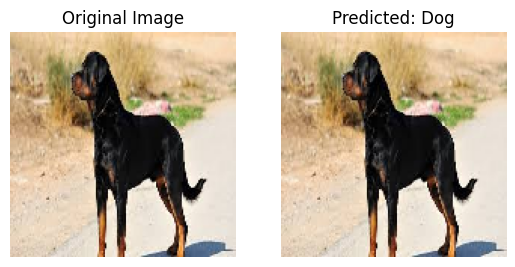

In [32]:
# Load and preprocess the image
img_path = '/content/dog.jpeg'
make_prediction2(img_path)